#### I. Protocole H.L avec 1 stimulus

In [1]:
import numpy as np
import MotionClouds as mc
import matplotlib.pyplot as plt
import os
import imageio
import random
from psychopy import visual, core, event, gui, data
import MotionClouds as MC

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
exp_name = "Perception de l'orientation"
exp_info = {'participant':''}
#exp_info['date'] = data.getDateStr()
subj_info = gui.DlgFromDict(dictionary=exp_info, title=exp_name)
exp_info['exp_name']=exp_name


In [3]:
downscale = 1
fig_width = 21
fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)

In [4]:
def generate_random_cloud(theta, B_theta, downscale = 1):
    fx, fy, ft = mc.get_grids(mc.N_X/downscale, mc.N_Y/downscale, 1)
    mc_i = mc.envelope_gabor(fx, fy, ft, V_X=0., V_Y=0.,
                             B_V=0, theta=theta, B_theta=B_theta)
    im = mc.random_cloud(mc_i)
    im = (mc.rectif(im) * 255).astype('uint8')
    fname = 'tmp/%s_%s.png' % (theta, B_theta)
    imageio.imwrite(fname, im[:, :, 0])
    return fname


In [5]:
from psychopy import visual, core, event
import MotionClouds as MC

test_length = 150  # number of trials
fixation_length = .5  # length of fixation, in second
stim1_length = 0.25  # length of first stim, in second
stim2_length = 0.25  # length of the second stim, in second 

fullscr = False

fullscr = True



In [6]:
# Psychopy window

win = visual.Window(fullscr=fullscr, color=[0,0,0], winType='pygame', monitor='testMonitor', units='height')
mouse = event.Mouse(visible=False)

fixation = visual.ShapeStim(vertices='cross', win=win, size=0.05, pos=[0, 0], fillColor='black', units='height')
fixation.autolog = False

MC1 = generate_random_cloud(np.pi/2, B_theta=np.pi/2)
bitmap1 = visual.ImageStim(win, MC1, mask='gauss', size=0.8, units='height')
bitmap1.autolog = False 

msg = visual.TextStim(win, text='?', color='black')


# Answer list
import time
start_time = time.time()
print("Test started")


ans_list = []
N_B_thetas = 3
B_thetas = np.pi*np.logspace(-7, 0, N_B_thetas, base=2)
    
std_theta = np.pi/6
for trial in range(test_length):
    clock = core.Clock()
    fixation.draw()
    win.flip()
    
    theta = std_theta * np.random.randn()

    # MC generation
    B_theta = B_thetas[random.randint(0, N_B_thetas-1)]

    MC1 = generate_random_cloud(np.pi/2-theta, B_theta=B_theta)  #j'ai rajouté np.pi/2 - theta
    bitmap1.setImage(MC1)

    # Times the trial
    while clock.getTime() < fixation_length + stim1_length + stim2_length:
        if 0.0 <= clock.getTime() < fixation_length:  # fixation
            fixation.draw()
        if fixation_length + 0.01 <= clock.getTime() < fixation_length + stim1_length: 
            bitmap1.draw()
            win.flip()
        if fixation_length + stim1_length <= clock.getTime() < fixation_length + stim1_length + stim2_length:
            msg.draw()
            

    # display orientation choice
   
    win.flip()

    # answer using the keyboard
    while True:
        ans = event.waitKeys()

        if ans == ['escape', 'q']:
            win.close()
            core.quit()
        elif ans[0] in ['left', 'right']:
            correct = (np.sign(theta) > 0) and (ans[0]=='right')
            print('At trial ', trial, 'Angle=', '%3.3f' % (theta*180/np.pi), 'answer is ',
                ans[0], '(correct=', correct, '); bandwidth=', '%.3f' % (B_theta*180/np.pi))    
            break

    # Output shape per trial is : trial number, shift direction, answered shift and b_theta
    ans_list.append([trial, theta, ans[0], B_theta])

win.close()

Test started
At trial  0 Angle= -7.464 answer is  right (correct= False ); bandwidth= 180.000
At trial  1 Angle= -58.167 answer is  left (correct= False ); bandwidth= 15.910
At trial  2 Angle= -3.648 answer is  left (correct= False ); bandwidth= 15.910
At trial  3 Angle= 17.211 answer is  right (correct= True ); bandwidth= 1.406
At trial  4 Angle= 25.896 answer is  right (correct= True ); bandwidth= 1.406
At trial  5 Angle= 3.811 answer is  right (correct= True ); bandwidth= 180.000
At trial  6 Angle= -4.524 answer is  left (correct= False ); bandwidth= 1.406
At trial  7 Angle= -16.748 answer is  left (correct= False ); bandwidth= 15.910
At trial  8 Angle= 87.320 answer is  right (correct= True ); bandwidth= 180.000
At trial  9 Angle= 19.415 answer is  right (correct= True ); bandwidth= 15.910
At trial  10 Angle= 7.547 answer is  right (correct= True ); bandwidth= 180.000
At trial  11 Angle= 29.532 answer is  right (correct= True ); bandwidth= 180.000
At trial  12 Angle= 25.921 answer 

In [7]:
import pickle
pickle.dump(ans_list, open('Psychophys_discrim_%s.p' % exp_info['participant'], 'wb'))
#on sauve nos superbes données

In [31]:
%ls C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta

 Le volume dans le lecteur C n'a pas de nom.
 Le num‚ro de s‚rie du volume est 5C12-EBC7

 R‚pertoire de C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta

28/01/2020  17:14    <DIR>          .
28/01/2020  17:14    <DIR>          ..
28/01/2020  16:27             9ÿ045 Psychophys_discrim_JF1.p
28/01/2020  17:07             9ÿ051 Psychophys_discrim_JF2.p
28/01/2020  17:13             9ÿ041 Psychophys_discrim_JF3.p
               3 fichier(s)           27ÿ137 octets
               2 R‚p(s)  133ÿ709ÿ975ÿ552 octets libres


In [4]:
import pickle
import matplotlib.pyplot as plt

subj_name_list =  ['JF1','JF2','JF3']

                
subj_data_list = []

for subject in subj_name_list :
    x = pickle.load(open(r'C:\Users\Utilisateur\Documents\psychophysics_data\pilote\B_theta\Psychophys_discrim_%s.p'%subject, 'rb'))

    #pickle.load,charge le contenu du fichier B_theta dans x
    
    subj_data_list.append(x)

In [5]:
subj_data_list

[[[0, 0.03283815170609325, 'right', 0.02454369260617026],
  [1, -0.3396483030930829, 'right', 3.141592653589793],
  [2, 0.5867001774799648, 'right', 0.02454369260617026],
  [3, 0.4070478350209635, 'right', 0.02454369260617026],
  [4, 0.3584642692981466, 'right', 0.2776801836348979],
  [5, -0.06440274924629633, 'left', 0.02454369260617026],
  [6, -0.540034114484341, 'left', 0.02454369260617026],
  [7, -0.26112219928418945, 'left', 0.2776801836348979],
  [8, 0.4281626359865481, 'right', 3.141592653589793],
  [9, 0.42501603591506965, 'right', 0.02454369260617026],
  [10, -0.5686762842559546, 'right', 3.141592653589793],
  [11, -0.2421452423877995, 'left', 3.141592653589793],
  [12, -1.0473526342059936, 'left', 0.2776801836348979],
  [13, -0.09953604872146024, 'right', 3.141592653589793],
  [14, -1.9219194207489338, 'right', 3.141592653589793],
  [15, 0.5040140244121306, 'right', 3.141592653589793],
  [16, 1.3378019040463585, 'right', 0.02454369260617026],
  [17, -0.012480043632631362, 'le

In [32]:
subj_name_list

['JF1', 'JF2', 'JF3']

[1.40625, 15.90990257669732, 180.0]


StopIteration: 

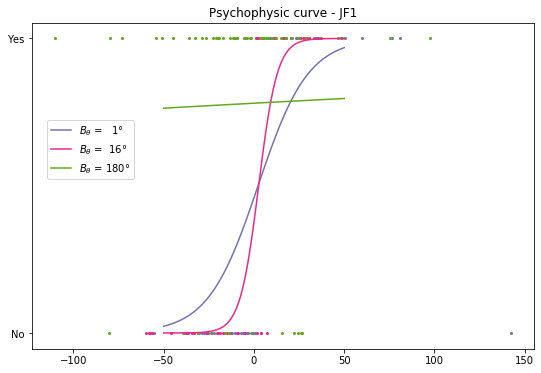

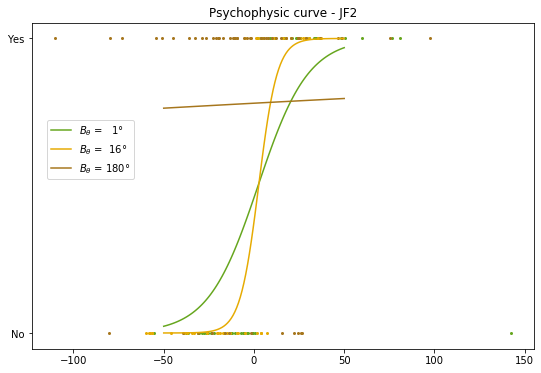

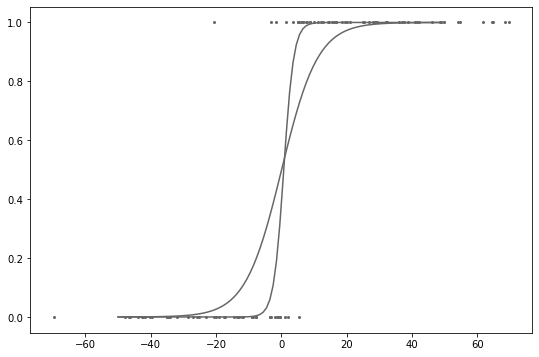

In [36]:
#representation graphique (regression logistique)
from sklearn.linear_model import LogisticRegression
import numpy as np

b_thetas_list = []
for x in subj_data_list[0] :
    b_thetas_list.append(x[3]*180/np.pi) #??

b_thetas_list = sorted(set(b_thetas_list))
print(b_thetas_list)

#the values used for plotting once the model is built
x_values = np.linspace(-50, 50, 100)
x_plot = np.reshape(x_values, (100,1))

lr_kwargs = dict(solver='liblinear', C = 3, max_iter=1000, penalty='l2', class_weight = {1 : 1 , 0 : 1}) #?????

coef_list = []
from matplotlib.pyplot import cm
color = iter(cm.Dark2(np.linspace(.3, 1,8)))

for num, subj_data in enumerate(subj_data_list) :
    plt.figure(figsize = (9,6))
    for ibtheta, b_theta in enumerate(b_thetas_list):
        X = []
        y =[]

        for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if False:
                    # fitting if correct 
                    if np.sign(i[1]) > 0 and i[2] == 'right':
                        y.append(1)
                    #elif np.sign(i[1]) < 0 and i[2]== "left":    #??? doute
                        #y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])
                else:
                    # fitting with direction 
                    if i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                    #y.append(i[1])


        #reshaped for fitting
        X = np.asarray(X)
        X = X[:,np.newaxis]
        col = next(color)
    
        lgs = LogisticRegression(**lr_kwargs) 
        try :
            lgs.fit(X, y)
            coef_list.append((b_theta,lgs.coef_[0][0]))
        
            y_values = lgs.predict_proba(x_plot)[:,1]
            plt.plot(x_values, y_values, label = r'$B_\theta$ = %3.f°' %b_theta,
                    color = col)
            plt.scatter(X, y, s=4, color = col)
        except :
            pass
        
        
   
    plt.title('Psychophysic curve - %s' % subj_name_list[num])
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.legend(loc = (0.03, 0.52)) #tuple of axis coordinate is also valid
    
    plt.show

IndexError: list index out of range

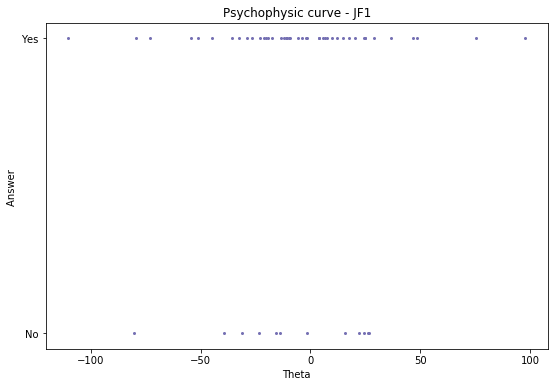

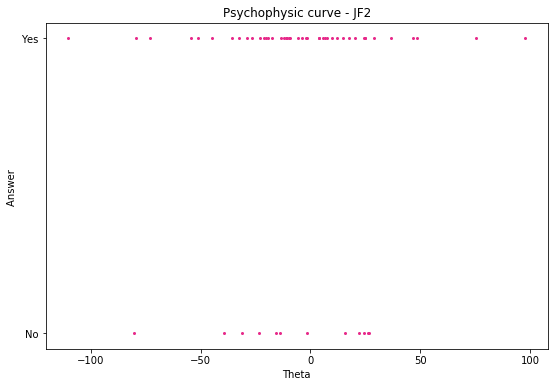

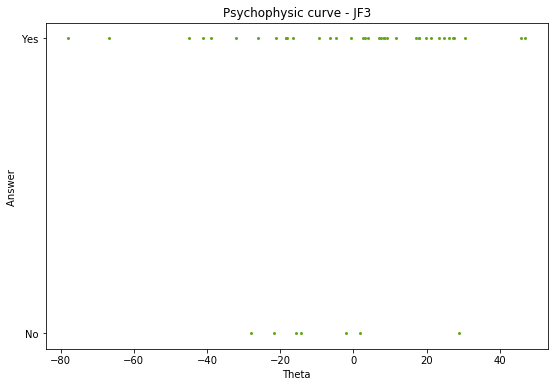

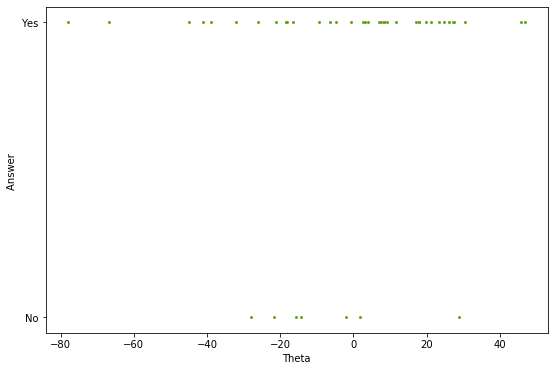

In [26]:
#autre représentation possible

from matplotlib.pyplot import cm
color = iter(cm.Dark2(np.linspace(.3, 1,8)))

for num,subj_data in enumerate(subj_data_list) :
    plt.figure(figsize = (9,6))
    #for ibtheta, b_theta in enumerate(b_thetas_list):
    X = []
    y = []
    for i in subj_data :
            if i[3]*180/np.pi == b_theta :
                X.append(i[1]*180/np.pi)
                if False: 
                    if np.sign(i[1]) > 0 and i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
                else: 
                    if i[2] == 'right':
                        y.append(1)
                    else :
                        y.append(0)
            
    col = next(color)                    
    X = np.asarray(X)
    X = X[:,np.newaxis]             
    plt.rcParams["figure.figsize"] = [12, 9]
    plt.scatter(X, y, s=4, color = col)
    plt.yticks([0.,1.],['No', 'Yes'])
    plt.xlabel("Theta")
    plt.ylabel("Answer ")      
    plt.title('Psychophysic curve - %s' % subj_name_list[num])